In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

Using TensorFlow backend.
/home/admin123/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/admin123/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/admin123/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

### Load dataset

In [2]:
data = np.loadtxt('train.csv', skiprows=1, delimiter=',')
data_test = np.loadtxt('test.csv', skiprows=1, delimiter=',')

In [3]:
X = data[:, 1:].reshape(len(data), 28, 28)
y = data[:, 0]

X2_test = data_test.reshape(len(data_test), 28, 28)

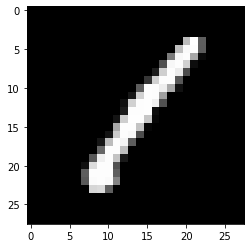

In [4]:
plt.imshow(X[0], cmap='gray')

### Normalize + Split data

In [5]:
X = (X / 255).reshape(len(X), 28, 28, 1)
y = to_categorical(y)

data_test = (data_test / 255).reshape(len(data_test), 28, 28, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Train model

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1)),
    Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 32)          25632     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 32)          25632     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
__________

In [12]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
31500/31500 [==============================] - 12s 388us/step - loss: 0.2232 - acc: 0.9303
Epoch 2/10
31500/31500 [==============================] - 12s 383us/step - loss: 0.0886 - acc: 0.9723
Epoch 3/10
31500/31500 [==============================] - 13s 413us/step - loss: 0.0631 - acc: 0.9813
Epoch 4/10
31500/31500 [==============================] - 15s 469us/step - loss: 0.0530 - acc: 0.9845
Epoch 5/10
31500/31500 [==============================] - 13s 418us/step - loss: 0.0482 - acc: 0.9865
Epoch 6/10
31500/31500 [==============================] - 13s 407us/step - loss: 0.0430 - acc: 0.9877
Epoch 7/10
31500/31500 [==============================] - 12s 390us/step - loss: 0.0369 - acc: 0.9892
Epoch 8/10
31500/31500 [==============================] - 12s 392us/step - loss: 0.0375 - acc: 0.9904
Epoch 9/10
31500/31500 [==============================] - 12s 384us/step - loss: 0.0312 - acc: 0.9921
Epoch 10/10
31500/31500 [==============================] - 12s 384us/step - loss: 

In [13]:
model.evaluate(X_test, y_test)

10500/10500 [==============================] - 1s 126us/step


[0.09307822258433407, 0.9841904761904762]

In [14]:
predictions = model.predict_classes(data_test)

In [15]:
result = pd.DataFrame({'ImageId': np.arange(1, len(predictions) + 1),
                       'Label': predictions})
result.to_csv('result.csv', index=False)